# About
Implement clustering algorithms
1. K-Means
1. Heirarchical clustering
1. DBSCAN

## The Team
| Name| Student ID|
|------------|---------------|
|Cynthia Cai | 5625483 |
|Pratyush Kumar | 5359252|


# Imports

// add the imports to the cell below

In [29]:
import numpy as np 
import pandas as pd
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import glob
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Reading the dataset


From the readme for the xyz files, we know that:

Ground truth labels:
|File range|Label|
|--|--|
|    000 - 099: |building|
|    100 - 199: |car|
|    200 - 299: |fence|
|    300 - 399: |pole|
|    400 - 499: |tree|



workflow:

iterate through the files, and collect them in a dataframe

Use [this link](https://pandas.pydata.org/docs/reference/api/pandas.concat.html#pandas.concat) for concatenating the dataframes

In [30]:
xyzPath = './scene_objects/data/*.xyz'

dataPathsList = glob.glob(xyzPath)

In [31]:
allPointsDF= pd.DataFrame(columns=['x','y','z', 'fileNo', 'groundLabel'])
# featureDF = pd.DataFrame(columns=['Label' , 'convHull', median] )

def df_maker(df1, df2):
    return pd.concat([df1, df2], sort=False, ignore_index=True)

labelToGive = None
for path in dataPathsList:
    indx = int(path.split('/')[-1][0:3])
    # if else to determine label
    if indx>=0 and indx<100:
        labelToGive = 'building' 
    elif indx>=100 and indx<200:
        labelToGive = 'car' 
    elif indx>=200 and indx<300:
        labelToGive = 'fence' 
    elif indx>=300 and indx<400:
        labelToGive = 'pole' 
    elif indx>=400 and indx<500:
        labelToGive = 'tree' 

    # print(indx, labelToGive)        

    # using pandas to read dataset and make a dataFrame
    tempDF = pd.read_csv(path, delimiter=' ', header=None, dtype=np.float64, names=['x','y','z'])
    tempDF.loc[:,'fileNo'] = indx
    tempDF.loc[:,'groundLabel'] = labelToGive

    # merge with megaDFofPoints
    allPointsDF = df_maker(allPointsDF, tempDF)

# allPointsDF.head()

In [5]:
# allPointsDF.set_index('fileNo').loc[:,'x':'z']

,x,y,z
fileNo,,,
0,20.070000,499.959991,17.450001
0,20.370001,499.160004,17.290001
0,18.860001,499.559998,18.129999
0,18.120001,499.709991,18.540001
0,17.360001,499.950012,19.000000
...,...,...,...
499,88.160004,137.250000,8.870000
499,89.070000,136.279999,9.180000
499,89.160004,135.559998,7.660000


In [ ]:
# save to pickle file
# allPointsDF.to_pickle('./scene_objects/compressedData.pkl')

## Making feature points
Identified feature points: `//add more`
* median height(z)
* convex hull

In [8]:
def label_determiner(indx):
    labelToGive=None
    if indx>=0 and indx<100:
        labelToGive = 'building' 
    elif indx>=100 and indx<200:
        labelToGive = 'car' 
    elif indx>=200 and indx<300:
        labelToGive = 'fence' 
    elif indx>=300 and indx<400:
        labelToGive = 'pole' 
    elif indx>=400 and indx<500:
        labelToGive = 'tree' 
    return labelToGive


featureDF = allPointsDF.groupby('fileNo').var()
featureDF.rename(columns={'x':'varX','y':'varY','z':'varZ'}, inplace=True)
featureDF.loc[:,'median_Z'] = allPointsDF.groupby('fileNo').z.median()
# featureDF.loc[:,'mean_Z'] = allPointsDF.groupby('fileNo').z.mean()

# range of x,y,z
featureDF.loc[:,'range_X'] = allPointsDF.groupby('fileNo').x.max() - allPointsDF.groupby('fileNo').x.min()
featureDF.loc[:,'range_Y'] = allPointsDF.groupby('fileNo').y.max() - allPointsDF.groupby('fileNo').y.min()
featureDF.loc[:,'range_Z'] = allPointsDF.groupby('fileNo').z.max() - allPointsDF.groupby('fileNo').z.min()

featureDF.loc[:,'Volume'] = allPointsDF.set_index('fileNo').loc[:,'x':'z'].groupby('fileNo').apply(ConvexHull).apply(lambda x: x.volume)

featureDF.loc[:,'label'] = featureDF.reset_index().fileNo.apply(label_determiner)
featureDF.to_pickle('./scene_objects/featureData.pkl')
featureDF

,varX,varY,varZ,median_Z,range_X,range_Y,range_Z,Volume,label
fileNo,,,,,,,,,
0,9.024868,1.760537,0.501052,17.92,10.480000,4.649994,5.02,104.189009,building
1,7.306054,2.628307,0.646622,7.53,10.540009,6.139984,3.60,137.366395,building
2,19.973520,18.707730,2.108935,13.35,17.039997,16.059998,7.49,1247.880682,building
3,27.224888,16.674539,2.437923,14.43,21.160004,16.750000,7.07,1326.712538,building
4,30.802399,22.456995,0.597981,7.80,23.579994,22.090012,5.21,1100.901866,building
...,...,...,...,...,...,...,...,...,...
495,2.468837,1.670906,2.625734,7.14,6.969986,5.820001,7.19,138.917876,tree
496,6.586047,4.938702,7.407274,9.84,10.640015,10.010002,12.44,645.231457,tree
497,1.379584,2.840469,2.370287,7.38,5.279999,6.920013,6.84,84.578072,tree


### Plotting to see resemblamces and clusters, if any
needed: seaborn

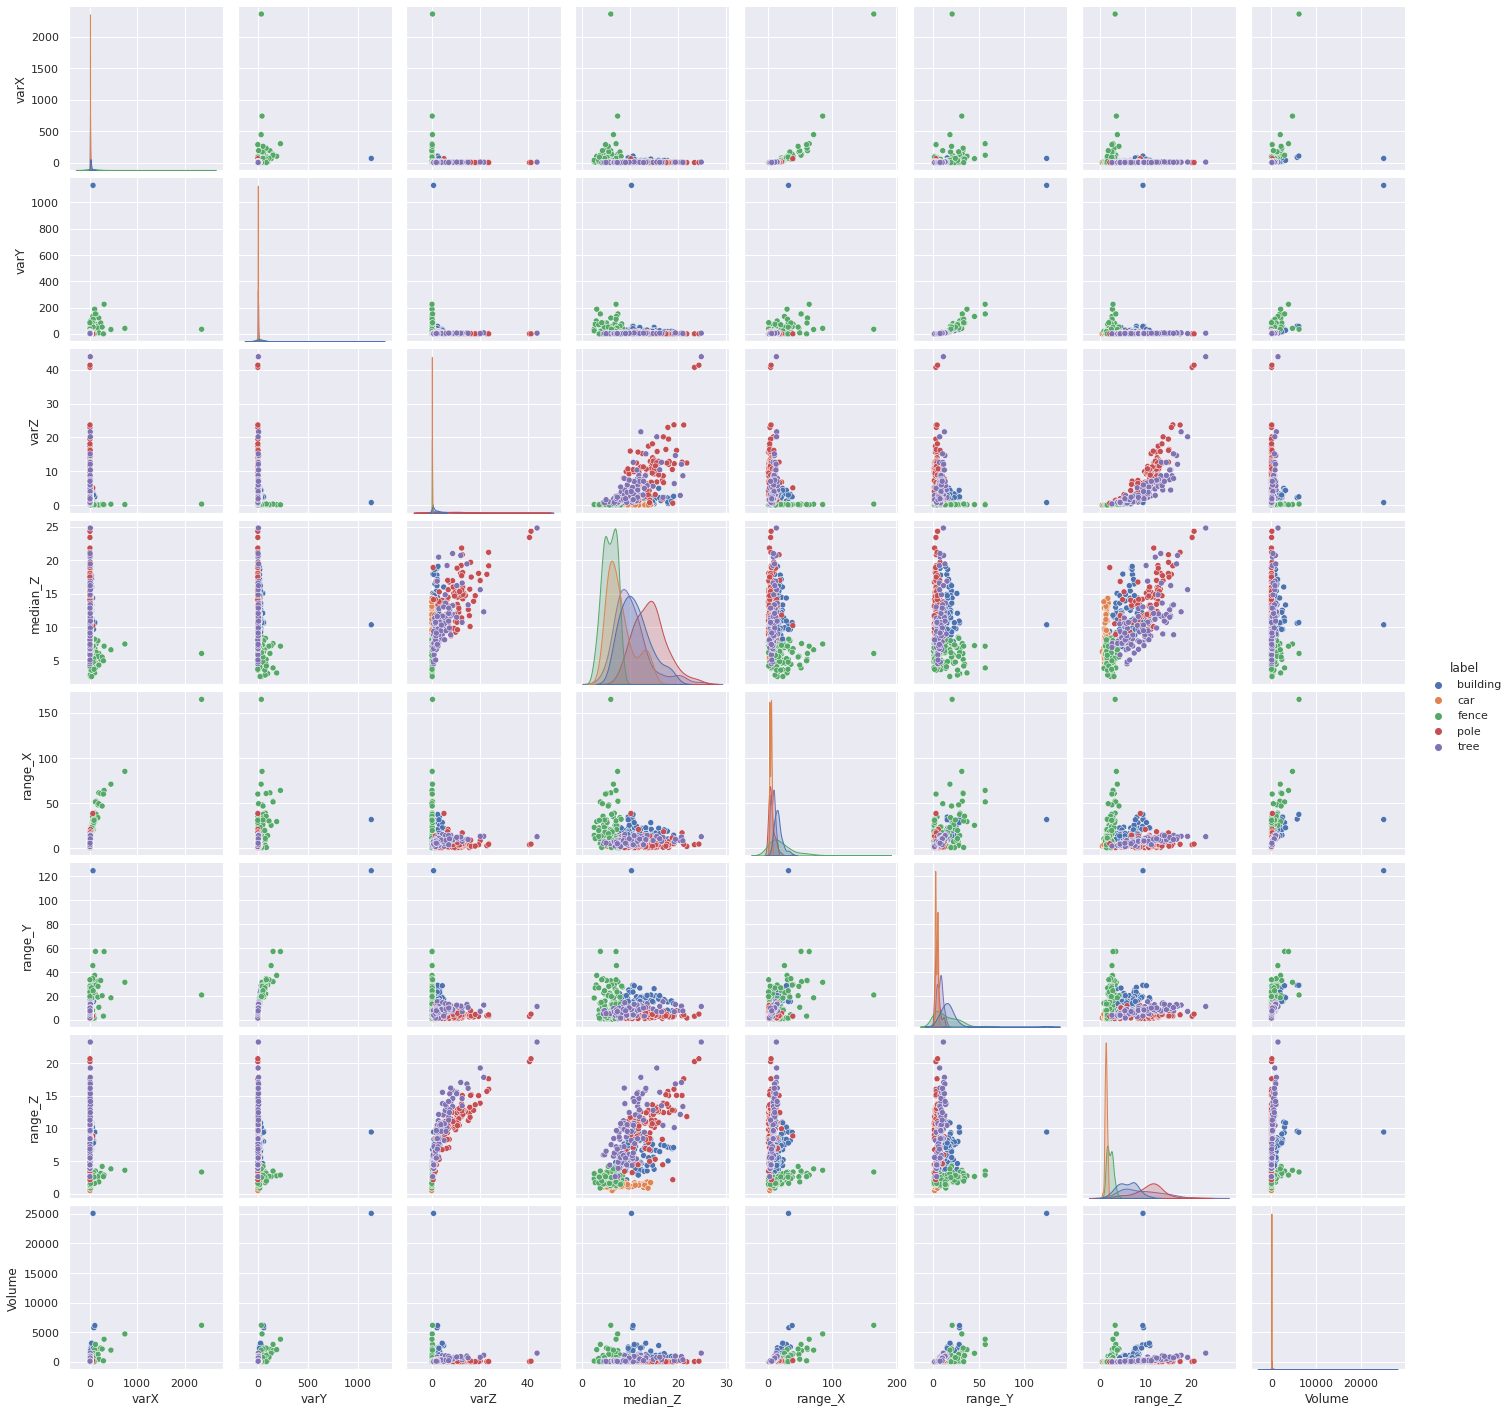

In [28]:
# plt.figure(figsize=(20,20));
# sns.relplot(x="Volume", y="varX", hue="label", palette='dark' ,data=featureDF);
sns.pairplot(data=featureDF, hue="label")

In [ ]:
# normalize the feature df

# Clustering Algorithms

In [ ]:
# import megaDF
allPointsDF = pd.read_pickle('./scene_objects/featureData.pkl')
allPointsDF.head()

## K-Means clustering

In [ ]:


def k_means():
    """
    summary: this function is not yet ready
    """
    pass

In [ ]:
k_means?

## Heirarchical clustering

## DBSCAN